# Assignment 4.1

Name: Subhabrata (Suvo) Ganguli  
Date: Feb 5, 2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

The code below shows the calculations. 

The estimated standard deviation of the mean estimator using the average of quatitles is 0.11 and is close to the theoretical standard error of 0.1

In [13]:
# import libraries

import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [8]:
# Generate 1,000 samples of size 50, take average of lower and upper quartiles

# number of observations
n = 100

# number of samples
n_sample = 100000

# mean of normal distribution
mu = 0

# standard deviation of normal distribution
std = 1

# set random seed
np.random.seed(42)

# percentile based mean estimator
y = []
for i in range(0,n_sample):
    x = norm.rvs(loc=mu, scale=std, size=n)
    calc = (np.quantile(x, 0.75) + np.quantile(x, 0.25))/2
    y.append(calc)
    
# Find standard deviation of the n_sample estimates
estimate_sd = np.std(y)

# Find the theoretical standard error
se = 1/np.sqrt(n)

# Print calculations
print('The estimated standard deviation is {}'.format(estimate_sd))
print('The theoretical standard error is {}'.format(se))

The estimated standard deviation is 0.11000056341771373
The theoretical standard error is 0.1


## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

See calculations and plot below.

Text(0.5, 1.0, 'Likelihood vs Probability (outcome of the first success on observation number y = 3)')

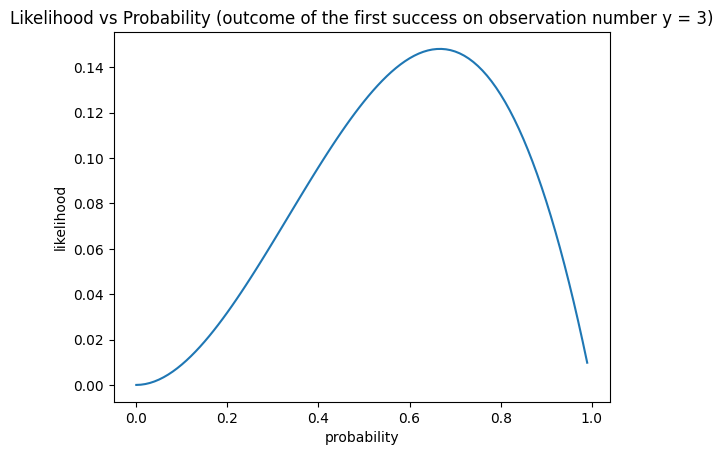

In [23]:
# vector of probability values

p_axis = np.arange(0,1,0.01)

# aggregrate likelihood function
L = []
for i in range(0,len(p_axis)):
    p = p_axis[i]
    L.append((p**2)*(1-p)) #  outcome of the first success on observation number y = 3

# create plot
plt.plot(p_axis,L)
plt.xlabel('probability')
plt.ylabel('likelihood')
plt.title('Likelihood vs Probability (outcome of the first success on observation number y = 3)')
    

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

See code below.

Interpretation: 
- Probability of students believing in life after death = 0.517
- It means that the  Wald 95% Confidence Invertal of probability of students believing in life after death is (0.390, 0.643)

Since the lower bound of 0.390 is less than 0.50, we cannot for certain say that majority of the students believe in life after death.

In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd

# read in the Students data file
df = pd.read_csv('Students.dat', sep='\s+')

df.head()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


In [63]:
# data frame for students believing in life after death
df_life = df.loc[df['life'] == 1]

n_life = df_life.shape[0]  # students believing in life after death
n = df.shape[0] # total students
print('Number of students believing in life after death = ', n_life )
print('Total number of students = ',n)

# Probability of number of students believing in life after death
p_hat = n_life/n
print("Probability of students believing in life after death = %.3f" % p_hat)

# Function to calculate Wald confidence interval
def wald_confidence_interval(p_hat, n, alpha=0.05):
    z_alpha_over_2 = norm.ppf(1 - alpha/2)
    margin_of_error = z_alpha_over_2 * np.sqrt((p_hat * (1 - p_hat)) / n)
    lower_bound = p_hat - margin_of_error
    upper_bound = p_hat + margin_of_error
    return lower_bound, upper_bound

lower_bound, upper_bound = wald_confidence_interval(p_hat, n)

# Print the results
print("Maximum Likelihood Estimate (MLE): {:.3f}".format(p_hat))
print("Wald 95% Confidence Interval: ({:.3f}, {:.3f})".format(lower_bound, upper_bound))


Number of students believing in life after death =  31
Total number of students =  60
Probability of students believing in life after death = 0.517
Maximum Likelihood Estimate (MLE): 0.517
Wald 95% Confidence Interval: (0.390, 0.643)


## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

(a) Between 1973 and 1980, the percentage in favor of grass initially increases. Then there was a downward trend till 1990. After that the support steadily increased will a minor exception in 2012.

(b) For 2018, the MLE and Wald scores are given by:
- Maximum Likelihood Estimate (MLE): 0.648
- Wald 95% Confidence Interval: (0.471, 0.825)

Since the minimum bound of the Wald 95% confidence interval is less than 50% (47.1%), we cannot for certain say that majority of the population supports legalization of marijuana.


Year = 1973, Ratio in Favor of Grass = 0.19
Year = 1975, Ratio in Favor of Grass = 0.21
Year = 1976, Ratio in Favor of Grass = 0.29
Year = 1978, Ratio in Favor of Grass = 0.31
Year = 1980, Ratio in Favor of Grass = 0.26
Year = 1983, Ratio in Favor of Grass = 0.21
Year = 1984, Ratio in Favor of Grass = 0.24
Year = 1986, Ratio in Favor of Grass = 0.18
Year = 1987, Ratio in Favor of Grass = 0.17
Year = 1988, Ratio in Favor of Grass = 0.18
Year = 1989, Ratio in Favor of Grass = 0.17
Year = 1990, Ratio in Favor of Grass = 0.17
Year = 1991, Ratio in Favor of Grass = 0.19
Year = 1993, Ratio in Favor of Grass = 0.23
Year = 1994, Ratio in Favor of Grass = 0.24
Year = 1996, Ratio in Favor of Grass = 0.27
Year = 1998, Ratio in Favor of Grass = 0.29
Year = 2000, Ratio in Favor of Grass = 0.34
Year = 2002, Ratio in Favor of Grass = 0.36
Year = 2004, Ratio in Favor of Grass = 0.36
Year = 2006, Ratio in Favor of Grass = 0.37
Year = 2008, Ratio in Favor of Grass = 0.40
Year = 2010, Ratio in Favor of G

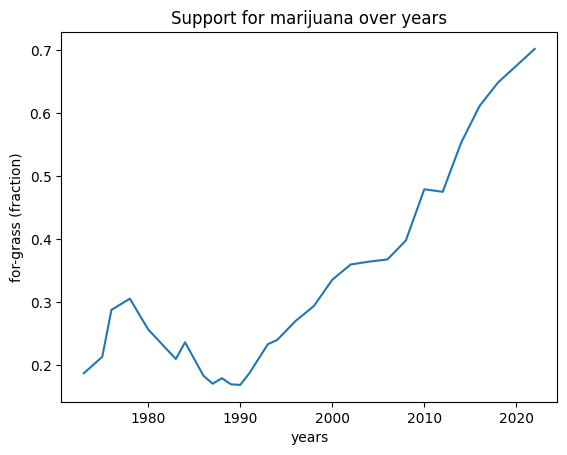

Year: 2018
Maximum Likelihood Estimate (MLE): 0.648
Wald 95% Confidence Interval: (0.471, 0.825)


In [133]:
# read in the Students data file
df = pd.read_csv('gss_data.csv')

# show data head
df.head()

# data length
n = df.shape[0]

# individual columns
year = df['year']
for_grass = df['for-grass']
against_grass = df['against-grass']
total = df['total']

# ratio for grass
ratio_grass = np.zeros(n)
for i in range(0,n):
    ratio_grass[i] = for_grass[i]/total[i]
    print("Year = {:.0f}, Ratio in Favor of Grass = {:.2f}".format(year[i],ratio_grass[i]))

# print percentage

# plot percentage for grass over years
plt.plot(year,ratio_grass)
plt.xlabel('years')
plt.ylabel('for-grass (fraction)')
plt.title('Support for marijuana over years')
plt.show()

# 2018 data
p_hat = 938/1447

lower_bound, upper_bound = wald_confidence_interval(p_hat, n)

# Print the results
print("Year: 2018")
print("Maximum Likelihood Estimate (MLE): {:.3f}".format(p_hat))
print("Wald 95% Confidence Interval: ({:.3f}, {:.3f})".format(lower_bound, upper_bound))

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

The margin of error, E, can be expressed as 

E = z * sqrt(p*(1-p)/n)

where, z = 1.96 (corresponds to 95% confidence)
p = probability of estimated proportion of school children in Boston living in a single-parent family, assuming = 0.5
n = sample size

Based upon the calculations shown below, n = 385

In [140]:
# z-score for 95% confidence level
z = 1.96

# probability of estimated proportion of school children in Boston living in a single-parent family, 
# assuming maximum varibiity
p = 0.5

# E is the desired margin of error 
E = 0.05

n = z**2 / E**2 * p * (1-p)

n_ceil = np.ceil(n)

print("Sample size = %d " %(n_ceil))

Sample size = 385 


## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

(a) Give the data, we calculate the mean, standard deviation, standard error. Since the number of samples is < 30, we use t-statistics for calculations. Then based on 95% level confidence, we use the t-critical of 2.262. Hence, we have:
- Confidence level lower margin = 0.99 hours for mean
- Confidence level upper margin = 2.79 hours for mean


In [201]:
# import libraries
from scipy import stats
from scipy.stats import t

# tv hours
tv = [0, 1, 1, 1, 2, 2, 3, 3, 4]

# length, mean, standard deviation and standard error
n = len(tv)
mean = np.mean(tv)
std = np.std(tv)
se = std/np.sqrt(n)

# t-critical
confidence_level = 0.95
alpha = 1 - confidence_level
dof = n-1
t_critical = t.ppf(1 - alpha/2, dof)

# confidence margins
ci_lower_margin = mean - t_critical*se
ci_upper_margin = mean + t_critical*se

# print results
print("Confidence level lower margin = %.2f hours for mean" % ci_lower_margin)
print("Confidence level upper margin = %.2f hours for mean" % ci_upper_margin)

Confidence level lower margin = 0.97 hours for mean
Confidence level upper margin = 2.81 hours for mean


(b) If the fourth observation is 24 instead of 1, if we repeat the calculation, we get
- Confidence level lower margin = 0.00 hours (negative value is ceiling to zero)
- Confidence level upper margin = 9.83 hours

Since the confidence level spreads considerably wider, this indicates the presence of a potential outlier.  

In [200]:
# tv hours
tv = [0, 1, 1, 24, 2, 2, 3, 3, 4]

# length, mean, standard deviation and standard error
n = len(tv)
mean = np.mean(tv)
std = np.std(tv)
se = std/np.sqrt(n)

# t-critical
confidence_level = 0.95
alpha = 1 - confidence_level
dof = n-1
t_critical = t.ppf(1 - alpha/2, dof)

# confidence margins
ci_lower_margin = mean - t_critical*se
ci_upper_margin = mean + t_critical*se

# since hours can not be negative, we set a minimum to zero
ci_lower_margin = np.max([0, ci_lower_margin])

# print results
print("Confidence level lower margin = %.2f hours" % ci_lower_margin)
print("Confidence level upper margin = %.2f hours" % ci_upper_margin)

Confidence level lower margin = 0.00 hours
Confidence level upper margin = 9.83 hours


## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

(a) The calculations are shown below.

Note: We are assuming that female: gender = 0, and male: gender = 1.

Assumptions for the calculations are:
(i) the sample is random and representative of the population
(ii) the variable "hours spent watching TV" follows a normal distribution in the population or the sample size is sufficiently large due to the Central Limit Theorem (typically for practical purposes n ~> 30)
(iii) The data are independent and identically distributed.

TV Descriptive Statistics:
 - Mean = 7.3
 - Std = 6.7
 - SE = 0.9
 - number of samples = 60
   
Inferential Statistics
- Confidence level lower margin = 5.58 hours
- Confidence level upper margin = 8.95 hours

(b) Since for both female and male sample number is around 30, we use the z-score to calculate the inferential statistics. 

Here are the summaries for descriptive and inferential statitics

Female TV Descriptive Statistics:
 - Mean = 6.5
 - Std = 7.0
 - SE = 1.3
 - number of samples = 29
   
Male TV Descriptive Statistics:
 - Mean = 8.0
 - Std = 6.3
 - SE = 1.1
 - number of samples = 31
   
Inferential Statistics
- Lower CI for female tv around mean = 3.96
- Upper CI for female tv around mean = 9.04
- Lower CI for male tv around mean = 5.78
- Upper CI for male tv around mean = 10.19

The mean female tv time (6.5) is lower than the male tv time (8.0). However, the confidence intervals overlap. So, we cannot conclusively say with 95% confidence, that female watch less tv than male

In [211]:
# Import necessary libraries
import numpy as np
import pandas as pd

# read in the Students data file
df = pd.read_csv('Students.dat', sep='\s+')

df.head()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


In [219]:
# tv hours
tv = df['tv']

# length, mean, standard deviation and standard error
n = len(tv)
mean = np.mean(tv)
std = np.std(tv)
se = std/np.sqrt(n)

print("TV Descriptive Statistics:")
print(" - Mean = %.1f" % mean)
print(" - Std = %.1f" % std)
print(" - SE = %.1f" % se)
print(" - number of samples = %d" % len(tv))

# z score corresponding to 95% level confidence
z = 1.96

# confidence margins
ci_lower_margin = mean - z*se
ci_upper_margin = mean + z*se

# print results
print("Inferential Statistics")
print("Confidence level lower margin = %.2f hours" % ci_lower_margin)
print("Confidence level upper margin = %.2f hours" % ci_upper_margin)

TV Descriptive Statistics:
 - Mean = 7.3
 - Std = 6.7
 - SE = 0.9
 - number of samples = 60
Inferential Statistics
Confidence level lower margin = 5.58 hours
Confidence level upper margin = 8.95 hours


In [216]:
# length of dataset
n = df.shape[0]

female_tv = []
male_tv = []
for i in range(0,n):
    if df['gender'][i] == 0:
        female_tv.append(df['tv'][i])
    else:
        male_tv.append(df['tv'][i])

# Descriptive statistics

mean_female_tv = np.mean(female_tv)
std_female_tv = np.std(female_tv)
se_female_tv = std_female_tv/np.sqrt(len(female_tv))

print("Female TV Descriptive Statistics:")
print(" - Mean = %.1f" % mean_female_tv)
print(" - Std = %.1f" % std_female_tv)
print(" - SE = %.1f" % se_female_tv)
print(" - number of samples = %d" % len(female_tv))

mean_male_tv = np.mean(male_tv)
std_male_tv = np.std(male_tv)
se_male_tv = std_male_tv/np.sqrt(len(male_tv))

print("Male TV Descriptive Statistics:")
print(" - Mean = %.1f" % mean_male_tv)
print(" - Std = %.1f" % std_male_tv)
print(" - SE = %.1f" % se_male_tv)
print(" - number of samples = %d" % len(male_tv))

# Inferential Statistics

# z-score
z = 1.96 # 95% confidence level

# Confidence intervals around mean
ci_lower_female_tv = mean_female_tv - z*se_female_tv
ci_upper_female_tv = mean_female_tv + z*se_female_tv
ci_lower_male_tv = mean_male_tv - z*se_male_tv
ci_upper_male_tv = mean_male_tv + z*se_male_tv

print("Inferential Statistics")
print("Lower CI for female tv around mean = %.2f" % ci_lower_female_tv)
print("Upper CI for female tv around mean = %.2f" % ci_upper_female_tv)
print("Lower CI for male tv around mean = %.2f" % ci_lower_male_tv)
print("Upper CI for male tv around mean = %.2f" % ci_upper_male_tv)


Female TV Descriptive Statistics:
 - Mean = 6.5
 - Std = 7.0
 - SE = 1.3
 - number of samples = 29
Male TV Descriptive Statistics:
 - Mean = 8.0
 - Std = 6.3
 - SE = 1.1
 - number of samples = 31
Inferential Statistics
Lower CI for female tv around mean = 3.96
Upper CI for female tv around mean = 9.04
Lower CI for male tv around mean = 5.78
Upper CI for male tv around mean = 10.19


## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

The calculations are shown below. 

If we do the analysis for the female and male samples separately, based upon the data we have:
- Confidence level lower margin (female) = 0.84 hours
- Confidence level upper margin (female) = 0.88 hours
- Confidence level lower margin (male) = 0.72 hours
- Confidence level upper margin (male) = 0.77 hours

Since the confidence intervals for the males and females do no overlap, we can conclude there is a statitically significiant proportion than more females believe in life after death than females.

In [175]:
# female beliefs
# --------------
female_yes = 1017
female_total = 1178
female_no = female_total - female_yes

# sample proportion of female believing
p_hat_female = female_yes/female_total

# standard error for females
se_female = np.sqrt(p_hat_female*(1-p_hat_female)/female_total)

# zscore for 95% confidence level
z = 1.96

# confidence margins
ci_lower_margin_female = p_hat_female - z*se_female
ci_upper_margin_female = p_hat_female + z*se_female

# print results for female
print("Confidence level lower margin (female) = %.2f hours" % ci_lower_margin_female)
print("Confidence level upper margin (female) = %.2f hours" % ci_upper_margin_female)


Confidence level lower margin (female) = 0.84 hours
Confidence level upper margin (female) = 0.88 hours


In [174]:
# male beliefs
# -------------
male_yes = 703
male_total = 945
male_no = male_total - male_yes

# sample proportion of female believing
p_hat_male = male_yes/male_total

# standard error for females
se_male = np.sqrt(p_hat_male*(1-p_hat_male)/male_total)

# zscore for 95% confidence level
z = 1.96

# confidence margins for males
ci_lower_margin_male = p_hat_male - z*se_male
ci_upper_margin_male = p_hat_male + z*se_male

# print results for female
print("Confidence level lower margin (male) = %.2f hours" % ci_lower_margin_male)
print("Confidence level upper margin (male) = %.2f hours" % ci_upper_margin_male)


Confidence level lower margin (male) = 0.72 hours
Confidence level upper margin (male) = 0.77 hours


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

(a) For the ML Estimation, since all prior students have answered yes, then the point estimate of the probability that the next student says yes is 1.

See calculations below.


In [180]:
n = 10
n_yes = 10
p = n_yes / n

print("MLE = %d" % (p))

MLE = 1


(b) Let us consider a beta-binomial distribution of Beta(alpha=1,beta=1).

After 10 yes answers, the alpha and beta are updated as alpha1 = 1 + 10, beta1 = 1

The Bayesian estimate is given by the new mean = alpha1 / (alpha1 + beta1) = 0.9167

In [179]:
alpha = 1
beta = 1
alpha1 = alpha + 10
beta1 = beta

bayesian_estimate = (alpha1/(alpha1+beta1))

print("Basesian estimate = %.4f" % bayesian_estimate)

Basesian estimate = 0.9167


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

## Report

Here's the infomation for the new and old house prices using descriptive statistics

New House Price Descriptive Statistics:
 - Mean = 436.4
 - Std = 209.6
 - SE = 63.2
 - number of samples = 11
   
Old House Price Descriptive Statistics:
 - Mean = 207.9
 - Std = 120.4
 - SE = 12.8
 - number of samples = 89

Since the number of new house are relatively small (<30), we will use t-statistics to come up with inferential statistics. However, since the number of old houses are > 30, we can use z-score.

New house:
- Lower CI for newhouse price around mean = 295.63
- Upper CI for newhouse price around mean = 577.26

Old house:
- Lower CI for oldhouse price around mean = 182.85
- Upper CI for oldhouse price around mean = 232.86

Assumptions for the calculations are:
(i) the sample is random and representative of the population.
(ii) the variable "hours spent watching TV" follows a normal distribution in the population or the sample size is sufficiently large due to the Central Limit Theorem. Depending whether the number of sample is < or > 30, we have used t-statistics and z-score respectively to derive the inferential statistics as mentioned above.
(iii) The data are independent and identically distributed.

Note: The calculations are shown below are used to determine the data for the report.


In [208]:
# Import necessary libraries
import numpy as np
import pandas as pd

# read in the housing data file
df = pd.read_csv('housing.dat', sep='\s+')

df.head()


,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


In [210]:
# length of dataset
n = df.shape[0]

newhouse_price = []
oldhouse_price = []
for i in range(0,n):
    if df['new'][i] == 1:
        newhouse_price.append(df['price'][i])
    else:
        oldhouse_price.append(df['price'][i])

# Descriptive statistics

mean_newhouse_price = np.mean(newhouse_price)
std_newhouse_price = np.std(newhouse_price)
se_newhouse_price = std_newhouse_price/np.sqrt(len(newhouse_price))

print("New House Descriptive Statistics:")
print(" - Mean = %.1f" % mean_newhouse_price)
print(" - Std = %.1f" % std_newhouse_price)
print(" - SE = %.1f" % se_newhouse_price)
print(" - number of samples = %d" % len(newhouse_price))

mean_oldhouse_price = np.mean(oldhouse_price)
std_oldhouse_price = np.std(oldhouse_price)
se_oldhouse_price = std_oldhouse_price/np.sqrt(len(oldhouse_price))

print("Old House Descriptive Statistics:")
print(" - Mean = %.1f" % mean_oldhouse_price)
print(" - Std = %.1f" % std_oldhouse_price)
print(" - SE = %.1f" % se_oldhouse_price)
print(" - number of samples = %d" % len(oldhouse_price))

# Inferential Statistics

# New house
# t-critical
confidence_level = 0.95 # 95% confidence level
alpha = 1 - confidence_level
dof = len(newhouse_price)-1
t_critical = t.ppf(1 - alpha/2, dof)

# Old House
# z-score
z = 1.96 # 95% confidence level

# Confidence intervals around mean
ci_lower_newhouse = mean_newhouse_price - t_critical*se_newhouse_price
ci_upper_newhouse = mean_newhouse_price + t_critical*se_newhouse_price
ci_lower_oldhouse = mean_oldhouse_price - z*se_oldhouse_price
ci_upper_oldhouse = mean_oldhouse_price + z*se_oldhouse_price

print("Lower CI for newhouse price around mean = %.2f" % ci_lower_newhouse)
print("Upper CI for newhouse price around mean = %.2f" % ci_upper_newhouse)
print("Lower CI for oldhouse price around mean = %.2f" % ci_lower_oldhouse)
print("Upper CI for oldhouse price around mean = %.2f" % ci_upper_oldhouse)


New House Descriptive Statistics:
 - Mean = 436.4
 - Std = 209.6
 - SE = 63.2
 - number of samples = 11
Old House Descriptive Statistics:
 - Mean = 207.9
 - Std = 120.4
 - SE = 12.8
 - number of samples = 89
Lower CI for newhouse price around mean = 295.63
Upper CI for newhouse price around mean = 577.26
Lower CI for oldhouse price around mean = 182.85
Upper CI for oldhouse price around mean = 232.86
